# Final Project
#### University of Vermont, CS295 Data Privacy
***
#### Authors: Dave Landay, Samson Durst                   
***
## Introduction
***
TODO:
* Define what Edge-DP is and how it is achieved
    * Two Graphs G and G' are neighbors if they differ by one edge 
* Define what Node-DP is and how it is achieved
    * Two graphs G and G' are neighbors if one can be obtained from the other by deleting a node and its adjacent edges. (i.e: differ by one node and sum total of edges connecting that node to other nodes in the network)
* Describe the issues with releasing certain graph metrics (i.e: releasing the number of edges doesn't satisfy node-DP)

In [5]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("..")

#Import stuff from dpnet package here ...
from dpnet import load_mtx, mechanisms

# Load Networks (networkx actually includes the karate club network):
#karate = load_mtx.load_mtx('../networks/karate/karate.mtx', create_using=None)
karate = nx.karate_club_graph()

#### Display an example network:

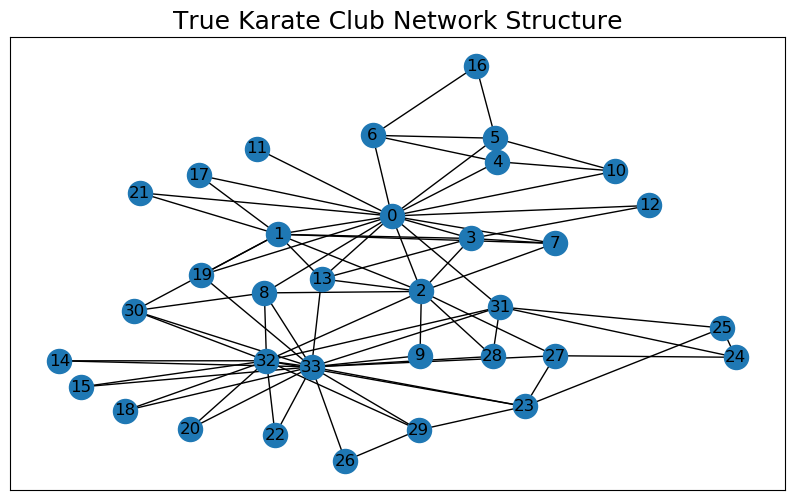

In [29]:
fig, ax = plt.subplots(figsize=(10,6), dpi=100)
pos = nx.kamada_kawai_layout(karate, scale=0.5)
nx.draw_networkx_edges(karate, pos)
nx.draw_networkx_nodes(karate, pos)
nx.draw_networkx_labels(karate, pos)
plt.title('True Karate Club Network Structure', fontsize=18)
plt.show()

In [3]:
num_nodes = len(karate.nodes)
num_edges = len(karate.edges)
print('number of edges in the karate network: {}\n \
number of nodes in the karate network: {}'.format(num_edges, num_nodes))

number of edges in the karate network: 78
 number of nodes in the karate network: 34


#### Over graphs, simple 1-dimensional queries (like counting the number of nodes) satisfy $(\epsilon, 0)$-node-DP

In [27]:
epsilon = 0.1
sensitivity = 1
mechanisms.laplace_mech(num_nodes, epsilon, sensitivity)

43.58681372171379

#### But releasing the number of edges is not kosher

#### Display the true degree distribution:

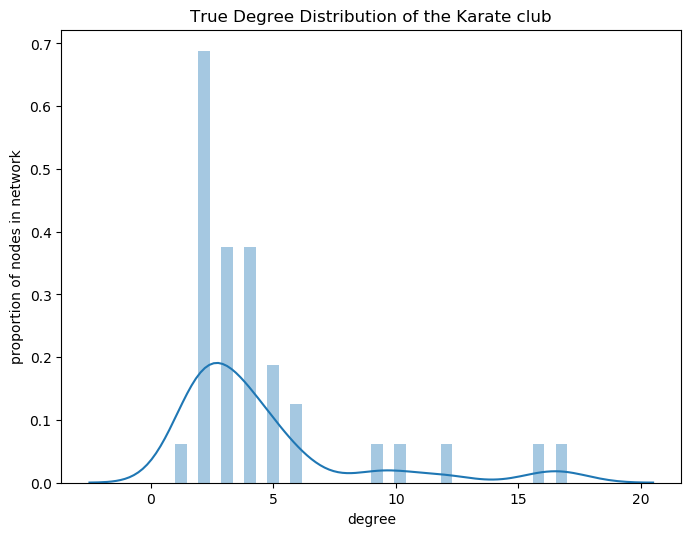

In [30]:
plt.subplots(figsize=(8,6), dpi=100)
bins = int(len(karate.nodes))
sns.distplot([v for k,v in karate.degree()], bins=bins)
plt.xlabel("degree")
plt.ylabel("proportion of nodes in network")
plt.title("True Degree Distribution of the Karate club")
plt.show()

#### Many real-world networks can exhibit power-law degree distributions, or extremely heavy tailed distributions. Hence, the sensitivity of counting queries (specifically range queries) needs to be high. Cannot use global sensitivity